##Step 2: Heart Attack data Predictive anlalysis: 
classification predictive models development for heart attack.

In [ ]:
## Import Libraries/Modeules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Loading the dataset from drive

df = pd.read_csv('drive/MyDrive/Datasets/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dataset Description:
Age : Age of the patient

Sex : Sex of the patient
(0 = male, 1 = female)

exang: exercise induced angina (1 = yes; 0 = no)


cp : Chest Pain type chest pain type;/
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results;/
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

oldpeak: Previous peak,ST depression induced by exercise relative to rest.

thal: thalassemia.

slp: 1-upsloping, 2-flat, 3-downsloping, The slope of the peak exercise ST segment

caa: number of major vessels (0-3)

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
print(df.shape)
print(df.info())
print('Missing values in dataset: ',df.isnull().sum().any())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
Missing values in dataset:  False


In [ ]:
df.drop_duplicates(inplace= True)
df.shape

(302, 14)

**TakeAway:**
Most of the people are having (in dataset):

1. Resting Blood pressure in between: 120-150 in mm hg
2. Cholesterol in between 150 - 300 mg/dl
3. Maximum Heart rate between 125 - 180.

### Heart disease over Distributed attributes

**TakeAway:** 

1. Patients getting heart attack are most likely in age between 45-60 Age group.
2. Patients having Resting blood pressure in range of 120-150 in mm hg are have more chances of getting heart attacks.
3. patients have higher chnaces of getting heart attack, that have cholesterol in range of 190 - 300 mg/dl.
4. patients have higher chnaces of getting heart attack then usual other patients, that have their maximum heart rate in range of 140-190. (if calculated in more precisely, then patients who have heart rate in range of 150-180)
5. If the measure of ST depression induced by exercise relative to rest in patients is in between 0-1 (most likely 0-0.5) then chances of that patinets having heart attack is high than others.



### Heart Disease over Other Attributes

**TakeAway:**

1. Most of the Male patients (around 75%) are more likely to have heart attack than feamle.
2. People who are having chest pain of type as atypical angina, non-anginal pain, asymptomatic chest pain are more likely to have heart attack.
3. People (around 55%) having fasting blood sugar rate around > 120 mg/dl are more likely to have heart attack, but if we compare then patients who may or may not have blood sugar is independent of having heart attack.
4. Almost 60% of people who have resting electrocardiographic results, i.e having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) are more likely to get heart attack.
5. Almost 70% Patinets who are having flat slope of the peak exercise ST segment are more likely to have heart attack then people with unslopping or downslopping value of eak exercise ST segment.
6. People having 0 major number of vessels are have chances of getting heart attack.

**TakeAway**: Higher heart attack chances in people having:
1. 200 - 280 mg/ dl cholesterol with 0, 1, 2 type of chest pain mentioned. (in description of dataset)
2. Resting bp of 120 - 140 mg HH and resting electrocardiographic results type 0, 1.
3. Maximum heart rate around 140 - 180 and chest pain of type 3rd (as mentioned in description of dataset.)

## Classification models development

### Preprocessing of data for training

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attributes and label seperation

In [ ]:
X = df.iloc[:,0: -1].values
y = df.iloc[:, -1].values

In [ ]:
print(X.shape, y.shape)

(302, 13) (302,)


Splitting the dataset into training and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Shape of training data: ', X_train.shape, y_train.shape)
print('Shape of test data: ', X_test.shape, y_test.shape)

Shape of training data:  (241, 13) (241,)
Shape of test data:  (61, 13) (61,)


Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

### XGBoost classifier

1. Simple XGB classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

clf_1 = XGBClassifier(objective = 'reg:logistic', n_estimator = 100, random_state = 0)
clf_1.fit(X_train, y_train)

# Evaluation
y_pred_1 = clf_1.predict(X_test)
print('accuracy is : ', accuracy_score(y_test, y_pred_1)) 
cm = confusion_matrix(y_test, y_pred_1)
cm

accuracy is :  0.8360655737704918


array([[23,  4],
       [ 6, 28]])

2. XGB classifier with grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning rate' : [0.01,0.1,0.2,0.5],
              'colsample_bytree':[0.4,0.6,0.8,1.0],
              'gamma': [0.5,1,2],
              'max_depth': [3,4,5,10]}
#clf_2
clf_2 = XGBClassifier(objective = 'reg:logistic', n_estimator = 600, random_state = 0)
Gridcv = GridSearchCV(estimator = clf_2, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose = 3)
Gridcv.fit(X_train_sc,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.800, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.667, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.792, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.833, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.917, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsampl

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.875, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=3, score=0.875, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4, score=0.800, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4, score=0.667, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4, score=0.875, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4 
[CV]  colsample_bytree=0.4, gamma=0.5, learning rate=0.01, max_depth=4, score=0.875, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0.5, learning rate

[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimator=600,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='reg:logistic', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 2],
           

In [ ]:
print('Best parameters: ',Gridcv.best_params_)
print('Best estimators: ',Gridcv.best_estimator_)
print('Best score: ',Gridcv.best_score_)

Best parameters:  {'colsample_bytree': 0.4, 'gamma': 0.5, 'learning rate': 0.01, 'max_depth': 4}
Best estimators:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.5,
              learning rate=0.01, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=None, n_estimator=600,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
Best score:  0.8466666666666667


3. Recursive feature elimination with cv

In [ ]:
from sklearn.feature_selection import RFECV

clf_3 = XGBClassifier(n_estimators= 100)
rfecv = RFECV(estimator = clf_3, step = 1, cv = 20, scoring = 'accuracy', n_jobs = -1).fit(X_train_sc, y_train)  

print('optimal number of features: ', rfecv.n_features_)
print('accuracy is: ', accuracy_score(y_test, rfecv.predict(X_test_sc)))

optimal number of features:  3
accuracy is:  0.8360655737704918


### Logistic Regression

1. selectkbest feature selection and Logistic regression

score list:  [ 10.87101487   7.96244926  47.90973251  10.63916043   5.81474148
   0.21264726   0.67326625 150.45253312  28.41081871  55.69873154
   7.78184109  68.27906078   4.30979316]
accuracy is:  0.8524590163934426


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


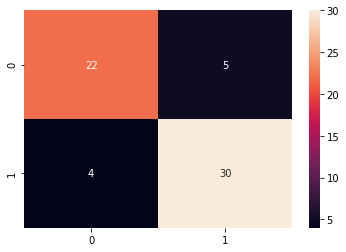

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k =11).fit(X_train, y_train)

print('score list: ', select_feature.scores_)

clf_4 = LogisticRegression(max_iter = 100)
X_train_kbest = select_feature.transform(X_train)
X_test_kbest = select_feature.transform(X_test)

clf_4.fit(X_train_kbest, y_train)

y_pred_4 = clf_4.predict(X_test_kbest)
print('accuracy is: ', accuracy_score(y_test, y_pred_4))
cm = confusion_matrix(y_test, y_pred_4)
sns.heatmap(cm, annot= True, fmt = 'd')

### Support Vector Machines

1. Simple SVM

accuracy is:  0.9016393442622951


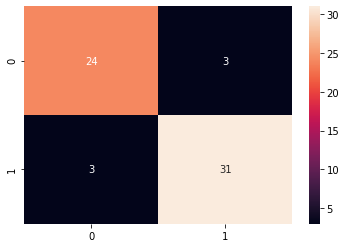

In [ ]:
from sklearn.svm import SVC
clf_5 = SVC(kernel = 'rbf')
clf_5.fit(X_train_sc,y_train)

y_pred_svm = clf_5.predict(X_test_sc)
print('accuracy is: ', accuracy_score(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot= True, fmt = 'd')

### KNN classifier

1. Simple KNN classifier with default parameters (n_neighbours = 5)

accuracy is:  0.9016393442622951


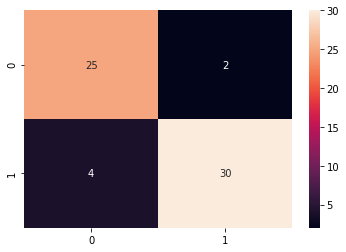

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_6 = KNeighborsClassifier(n_neighbors = 5)
clf_6.fit(X_train_sc,y_train)
y_pred_knn = clf_6.predict(X_test_sc)
print('accuracy is: ', accuracy_score(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot= True, fmt = 'd')

2. Grid search KNN classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[3,5,6,7], 'algorithm': ['auto']}

#clf_6
clf_6 = KNeighborsClassifier()
Gridcv_knn = GridSearchCV(estimator = clf_6, param_grid = parameters, scoring = 'accuracy', cv = 3, verbose = 2)
Gridcv_knn.fit(X_train_sc,y_train)

print('Best parameters: ',Gridcv_knn.best_params_)
print('Best estimators: ',Gridcv_knn.best_estimator_)
print('Best score: ',Gridcv_knn.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] .................... algorithm=auto, n_neighbors=5, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] .................... algorithm=auto, n_neighbors=5, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] .................... algorithm=auto, n_neighbors=5, total=   0.0s
[CV] algorithm=auto, n_neighbors=6 ...................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


**TakeAway**
By using 1. Support Vector Machine and 2. KN neighbours Classification algorithm 
- Highest Accuracy we got : 0.90163 (in both cases same)